In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import torch 
import torchvision 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms,models
from torchvision.transforms import v2
from pathlib import Path
import os 
import random
import torch.nn.functional as F
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay)
import PIL
from PIL import Image
torchvision.disable_beta_transforms_warning()
import cv2

In [2]:
image_path = Path("/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch")
train_dir = image_path / "train"
val_dir = image_path / "validate"
test_dir = image_path / "test"

train_dir,val_dir,test_dir

(PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/train'),
 PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/validate'),
 PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/test'))

In [3]:
img_transforms = v2.Compose([
    transforms.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize((0.5,),(0.5,))
])

img_transforms = v2.Compose([
    transforms.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize((0.5,),(0.5,))
])

In [4]:
from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir, #target folder defined above
                                  transform= img_transforms,
                                 )

test_data = datasets.ImageFolder(root= test_dir,
                                 transform= img_transforms)

val_data = datasets.ImageFolder(root= val_dir,
                                transform= img_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}\nVal data:\n {val_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 57072
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/train
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 7134
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/test
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )
Val data:
 Dataset ImageFolder
    Number of datapoints: 7134
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/validate
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )


In [5]:
train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=False)
val_dataloader = DataLoader(val_data,batch_size=64,shuffle=True)

train_dataloader,test_dataloader,val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ac0671e8880>,
 <torch.utils.data.dataloader.DataLoader at 0x7ac0671e8d60>)

In [6]:
target_names = train_data.classes
print(f"Targets name:\n{target_names}\n")

target_to_index = train_data.class_to_idx
print(f"Targets to index:\n{target_to_index}\n")

index_to_target = {value:key for key,value in target_to_index.items()}
print(f"Index to targets:\n{index_to_target}")

Targets name:
['अ', 'अं', 'अः', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'क्ष', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'ज्ञ', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'त्र', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']

Targets to index:
{'अ': 0, 'अं': 1, 'अः': 2, 'आ': 3, 'इ': 4, 'ई': 5, 'उ': 6, 'ऊ': 7, 'ए': 8, 'ऐ': 9, 'ओ': 10, 'औ': 11, 'क': 12, 'क्ष': 13, 'ख': 14, 'ग': 15, 'घ': 16, 'ङ': 17, 'च': 18, 'छ': 19, 'ज': 20, 'ज्ञ': 21, 'झ': 22, 'ञ': 23, 'ट': 24, 'ठ': 25, 'ड': 26, 'ढ': 27, 'ण': 28, 'त': 29, 'त्र': 30, 'थ': 31, 'द': 32, 'ध': 33, 'न': 34, 'प': 35, 'फ': 36, 'ब': 37, 'भ': 38, 'म': 39, 'य': 40, 'र': 41, 'ल': 42, 'व': 43, 'श': 44, 'ष': 45, 'स': 46, 'ह': 47, '०': 48, '१': 49, '२': 50, '३': 51, '४': 52, '५': 53, '६': 54, '७': 55, '८': 56, '९': 57}

Index to targets:
{0: 'अ', 1: 'अं', 2: 'अः', 3: 'आ', 4: 'इ', 5: 'ई', 6: 'उ', 7: 'ऊ', 8: 'ए', 9: 'ऐ', 10: 'ओ', 11: 'औ', 12: 'क', 13: 'क्ष', 14: 'ख'

In [4]:
index_to_targets = {0: 'अ', 1: 'अं', 2: 'अः', 3: 'आ', 4: 'इ', 5: 'ई', 6: 'उ', 7: 'ऊ', 8: 'ए', 9: 'ऐ', 10: 'ओ', 11: 'औ', 12: 'क', 13: 'क्ष', 14: 'ख', 15: 'ग', 16: 'घ', 17: 'ङ', 18: 'च', 19: 'छ', 20: 'ज', 21: 'ज्ञ', 22: 'झ', 23: 'ञ', 24: 'ट', 25: 'ठ', 26: 'ड', 27: 'ढ', 28: 'ण', 29: 'त', 30: 'त्र', 31: 'थ', 32: 'द', 33: 'ध', 34: 'न', 35: 'प', 36: 'फ', 37: 'ब', 38: 'भ', 39: 'म', 40: 'य', 41: 'र', 42: 'ल', 43: 'व', 44: 'श', 45: 'ष', 46: 'स', 47: 'ह', 48: '०', 49: '१', 50: '२', 51: '३', 52: '४', 53: '५', 54: '६', 55: '७', 56: '८', 57: '९'}

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"currently using {device}")

currently using cpu


In [6]:
model_state_path = "/kaggle/input/resnet-97/res97_state.pth"

In [7]:
model = models.resnet101(weights=None).to(device)
num_classes = 58
model.fc = nn.Linear(model.fc.in_features, num_classes).to(device)

In [8]:
model.load_state_dict(torch.load(model_state_path,map_location=device))

<All keys matched successfully>

In [9]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
               
total_params = count_parameters(model)
total_params

42619002

In [73]:
import cv2 
import numpy as np 

def crop_characters(img:np.array) -> np.array:
    blur_img =cv2.GaussianBlur(img,(5,5),3)
    gray = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

    bin_img= cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    thres_value,thresh_img= cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # cv2.drawContours(img,contours,-1,(0,255,0),2)


    bounding_boxes = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area<200:
            continue
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw rectangle around contour
        # cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0),1)
        
        # Store bounding box coordinates
        bounding_boxes.append((x, y, x + w, y + h))

    # Calculate the minimum bounding rectangle that encloses all the smaller bounding rectangles
    x_min = min(box[0] for box in bounding_boxes) 
    y_min = min(box[1] for box in bounding_boxes)
    x_max = max(box[2] for box in bounding_boxes)
    y_max = max(box[3] for box in bounding_boxes)

    padding_left=3
    padding_right =3
    padding_bottom =3
    padding_top =3
    x_min -= padding_left
    y_min -= padding_bottom
    x_max += padding_top
    y_max += padding_right

    # Draw the enclosing bounding rectangle
    # cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255),1)
    # print(len(contours))

    cropped_img = img[y_min:y_max, x_min:x_max]
    return cropped_img

img = cv2.imread("/home/pujan/D/programs/algorithms/test/Screenshot_2024-03-04-20-11-54_1366x768.png")
img = crop_characters(img)


(28, 28, 3)

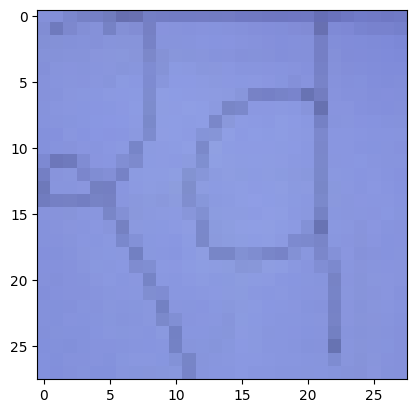

In [91]:
import cv2
org_img = cv2.imread("/kaggle/input/test-data-1/IMG_20240212_202802.jpg")
# org_img = cv2.resize(org_img,(28,28),interpolation=cv2.INTER_AREA)
image_with_rect, cropped_character = crop_character(org_img)
# org_img = cv2.imread("/kaggle/input/test-data-1/IMG_20240212_165747.jpg",
#                 cv2.IMREAD_GRAYSCALE)
img = cv2.resize(cropped_character,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(img,cmap="gray")
img.shape

(28, 28, 3)


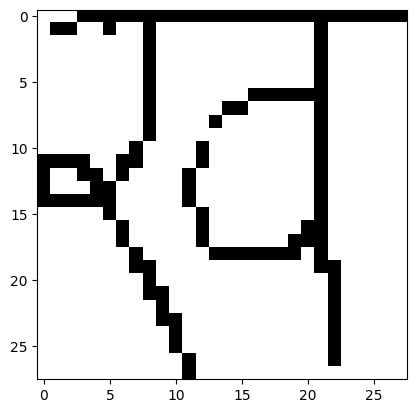

In [92]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bin = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,23,4) #second last parameter is block size and last is constant
thresh_rgb = cv2.cvtColor(img_bin,cv2.COLOR_GRAY2BGR)
print(thresh_rgb.shape)
plt.imshow(thresh_rgb,cmap="gray");

torch.Size([1, 3, 28, 28])

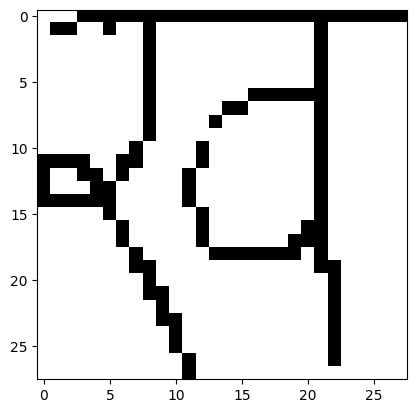

In [93]:
transformed_img = img_transforms(thresh_rgb).unsqueeze(dim=0)
img_numpy = transformed_img.numpy().squeeze()
img_numpy = np.transpose(img_numpy,(1,2,0))
plt.imshow(img_numpy,cmap="gray");
transformed_img.shape

In [87]:
with torch.inference_mode():
    transformed_img = transformed_img.to(device)
    outputs = model(transformed_img)
    _,predicted_index = torch.max(outputs.data,1) #returns max value and index
    probabilities = F.softmax(outputs,1)

max_probab = max(probabilities[0]).item()
print(f"Predicted character is: {index_to_targets[int(predicted_index)]} with probability: {(max(probabilities[0])).item():.6f}")


Predicted character is: क with probability: 0.990686


In [21]:
all_probabilities = probabilities.squeeze().tolist()
for i, prob in enumerate(all_probabilities):
    print(f"Class: {index_to_targets[i]}, Probability: {prob:.6f}")

Class: अ, Probability: 0.000032
Class: अं, Probability: 0.000007
Class: अः, Probability: 0.000031
Class: आ, Probability: 0.000003
Class: इ, Probability: 0.000003
Class: ई, Probability: 0.000001
Class: उ, Probability: 0.000013
Class: ऊ, Probability: 0.957971
Class: ए, Probability: 0.000002
Class: ऐ, Probability: 0.000038
Class: ओ, Probability: 0.000007
Class: औ, Probability: 0.000003
Class: क, Probability: 0.040704
Class: क्ष, Probability: 0.000026
Class: ख, Probability: 0.000011
Class: ग, Probability: 0.000003
Class: घ, Probability: 0.000006
Class: ङ, Probability: 0.000046
Class: च, Probability: 0.000006
Class: छ, Probability: 0.000021
Class: ज, Probability: 0.000004
Class: ज्ञ, Probability: 0.000004
Class: झ, Probability: 0.000572
Class: ञ, Probability: 0.000015
Class: ट, Probability: 0.000003
Class: ठ, Probability: 0.000036
Class: ड, Probability: 0.000004
Class: ढ, Probability: 0.000053
Class: ण, Probability: 0.000002
Class: त, Probability: 0.000005
Class: त्र, Probability: 0.000004


In [20]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:0000:01


/opt/conda/lib/python3.10/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


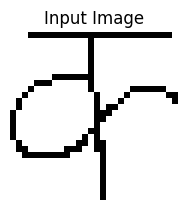

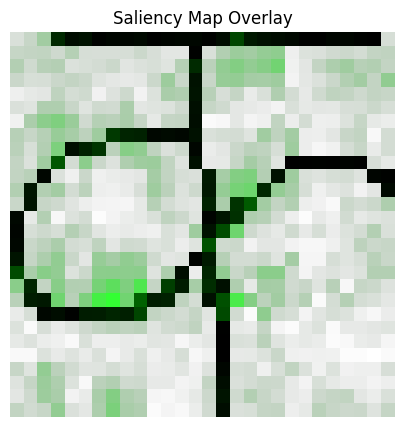

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

transformation = v2.Compose([
    transforms.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize((0.5,),(0.5,))
])

def visualize_saliency_map(input_image, saliency_map, threshold=None):
    # Plot the input image
    input_image = input_image.squeeze().numpy().transpose(1, 2, 0)
    plt.subplot(2, 1, 1)
    plt.imshow(input_image)  # Assuming input_image is a PyTorch tensor
    plt.title('Input Image')
    plt.axis('off')

    # Apply thresholding if specified
    if threshold is not None:
        saliency_map[saliency_map < threshold] = 0

    # Create a custom colormap for the saliency map overlay (red color for important pixels)
    colors = [(0, 0, 0, 0), (0, 1, 0, 1)]  # Transparent to red
    cmap_name = 'custom_red'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Plot the saliency map overlay with the custom colormap
    plt.figure(figsize=(5,5))
#     plt.subplot(2, 1, 2)
    plt.imshow(input_image)
    plt.imshow(saliency_map.squeeze(), cmap=cm, alpha=0.8)  # Overlay saliency map on input image
    plt.title('Saliency Map Overlay')
    plt.axis('off')

    # Show the plot
    plt.show()


from captum.attr import Saliency
# img = transformation(transformed_img).unsqueeze(dim=0)
# Assuming 'model', 'transformed_img', and 'predicted_index' are defined elsewhere
saliency = Saliency(model)
saliency_map = saliency.attribute(transformed_img.detach(), target=predicted_index)
saliency_map = saliency_map.detach().cpu().numpy()
saliency_map = np.abs(saliency_map)
saliency_map = np.max(saliency_map, axis=1)

# Visualize the saliency map with custom colormap
visualize_saliency_map(transformed_img, saliency_map)


Approximation delta:  tensor([1.3792], dtype=torch.float64)


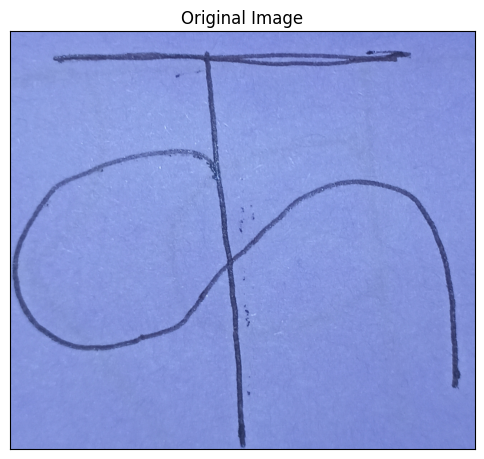

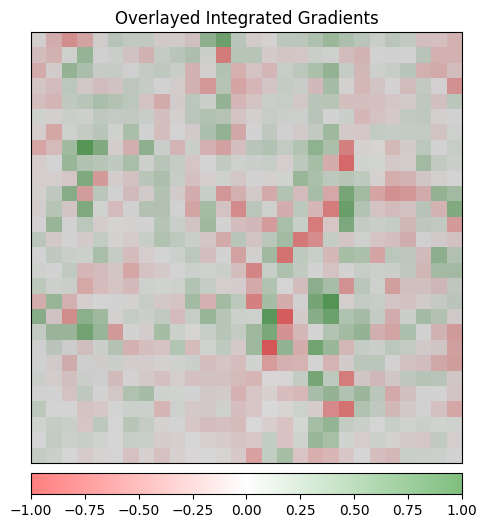

CPU times: user 3.55 s, sys: 183 ms, total: 3.73 s
Wall time: 2.88 s


In [22]:
%%time
from captum.attr import IntegratedGradients
from captum.attr import visualization as viz
from captum.attr import NoiseTunnel

def attribute_image_features(algorithm,image , **kwargs):
    model.zero_grad()
    tensor_attributions = algorithm.attribute(image,
                                              target=predicted_index,
                                              **kwargs
                                             )
    
    return tensor_attributions

ig = IntegratedGradients(model)
attr_ig, delta = attribute_image_features(ig, transformed_img, baselines=transformed_img * 0, return_convergence_delta=True)
attr_ig = np.transpose(attr_ig.squeeze().cpu().detach().numpy(), (1, 2, 0))
print('Approximation delta: ', abs(delta))

ig = IntegratedGradients(model)
nt = NoiseTunnel(ig)
# attr_ig_nt = attribute_image_features(nt, transformed_img, baselines=transformed_img * 0, nt_type='smoothgrad_sq',
#                                       nt_samples=100, stdevs=0.2)
# attr_ig_nt = np.transpose(attr_ig_nt.squeeze(0).cpu().detach().numpy(), (1, 2, 0))


original_image = org_img

_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Original Image")
    
img1,_ = viz.visualize_image_attr(attr_ig, original_image, method="blended_heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")

# _ = viz.visualize_image_attr(attr_ig_nt, original_image, method="blended_heat_map", sign="absolute_value", 
#                              outlier_perc=10, show_colorbar=True, 
#                              title="Overlayed Integrated Gradients \n with SmoothGrad Squared")
                             


In [23]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of learnable parameters:", total_params)

Total number of learnable parameters: 42619002


In [25]:

class_names = [f"Class {i}" for i in range(58)]
print("Confusion Matrix:")

plt.figure(figsize=(20, 20))

cm = confusion_matrix(true_labels,all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)

Confusion Matrix:


<Figure size 2000x2000 with 0 Axes>

In [27]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.1 MB/s eta 0:00:00:00:0100:01


In [28]:
import plotly.graph_objs as go
from IPython.display import display


class_names = [f"Class {i}" for i in range(58)]
print("Confusion Matrix:")

cm = confusion_matrix(true_labels, all_predictions)

# Create a Plotly heatmap trace
trace = go.Heatmap(
    x=class_names,
    y=class_names,
    z=cm,
    colorscale='Blues',
)

# Layout
layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted label'),
    yaxis=dict(title='True label'),
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Save the figure as an image
# fig.write_image("confusion_matrix.png")

display(fig);

Confusion Matrix:


In [32]:
import json
class NumpyArrayEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

my_data = fig.to_dict()
json_string = json.dumps(my_data, cls=NumpyArrayEncoder)
with open("confusion_matrix.json", "w") as file:
        file.write(json_string)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

num_classes=58

# Evaluation
model.eval()  
all_predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

class_names = [f"Class {index_to_targets[i]}" for i in range(num_classes)]
print("Classification Report:")
print(classification_report(true_labels, all_predictions, target_names=class_names))


Test Accuracy: 97.91%
Classification Report:
              precision    recall  f1-score   support

     Class अ       0.96      0.94      0.95       123
    Class अं       1.00      0.98      0.99       123
    Class अः       0.98      0.99      0.99       123
     Class आ       1.00      0.98      0.99       123
     Class इ       1.00      0.99      1.00       123
     Class ई       1.00      1.00      1.00       123
     Class उ       0.98      0.97      0.97       123
     Class ऊ       1.00      0.98      0.99       123
     Class ए       0.98      0.98      0.98       123
     Class ऐ       1.00      0.98      0.99       123
     Class ओ       0.98      1.00      0.99       123
     Class औ       1.00      0.98      0.99       123
     Class क       0.96      0.98      0.97       123
   Class क्ष       0.95      0.99      0.97       123
     Class ख       0.98      0.99      0.98       123
     Class ग       0.99      0.97      0.98       123
     Class घ       0.95      0.93   

In [48]:
re = classification_report(true_labels, all_predictions, target_names=class_names)
re

'              precision    recall  f1-score   support\n\n     Class अ       0.96      0.94      0.95       123\n    Class अं       1.00      0.98      0.99       123\n    Class अः       0.98      0.99      0.99       123\n     Class आ       1.00      0.98      0.99       123\n     Class इ       1.00      0.99      1.00       123\n     Class ई       1.00      1.00      1.00       123\n     Class उ       0.98      0.97      0.97       123\n     Class ऊ       1.00      0.98      0.99       123\n     Class ए       0.98      0.98      0.98       123\n     Class ऐ       1.00      0.98      0.99       123\n     Class ओ       0.98      1.00      0.99       123\n     Class औ       1.00      0.98      0.99       123\n     Class क       0.96      0.98      0.97       123\n   Class क्ष       0.95      0.99      0.97       123\n     Class ख       0.98      0.99      0.98       123\n     Class ग       0.99      0.97      0.98       123\n     Class घ       0.95      0.93      0.94       123\n     Cl

In [70]:
report = "Class अ       0.96      0.94      0.95       123\n    Class अं       1.00      0.98      0.99       123\n    Class अः       0.98      0.99      0.99       123\n     Class आ       1.00      0.98      0.99       123\n     Class इ       1.00      0.99      1.00       123\n     Class ई       1.00      1.00      1.00       123\n     Class उ       0.98      0.97      0.97       123\n     Class ऊ       1.00      0.98      0.99       123\n     Class ए       0.98      0.98      0.98       123\n     Class ऐ       1.00      0.98      0.99       123\n     Class ओ       0.98      1.00      0.99       123\n     Class औ       1.00      0.98      0.99       123\n     Class क       0.96      0.98      0.97       123\n   Class क्ष       0.95      0.99      0.97       123\n     Class ख       0.98      0.99      0.98       123\n     Class ग       0.99      0.97      0.98       123\n     Class घ       0.95      0.93      0.94       123\n     Class ङ       0.98      0.98      0.98       123\n     Class च       0.98      0.98      0.98       123\n     Class छ       0.98      0.98      0.98       123\n     Class ज       0.98      1.00      0.99       123\n   Class ज्ञ       0.99      0.95      0.97       123\n     Class झ       0.98      0.96      0.97       123\n     Class ञ       0.95      0.98      0.96       123\n     Class ट       0.98      0.99      0.98       123\n     Class ठ       1.00      0.97      0.98       123\n     Class ड       0.98      0.99      0.98       123\n     Class ढ       0.97      0.98      0.98       123\n     Class ण       1.00      0.99      1.00       123\n     Class त       0.98      0.99      0.98       123\n   Class त्र       0.98      0.98      0.98       123\n     Class थ       0.96      0.89      0.93       123\n     Class द       0.99      0.98      0.99       123\n     Class ध       0.95      0.95      0.95       123\n     Class न       1.00      0.98      0.99       123\n     Class प       0.98      0.93      0.96       123\n     Class फ       0.98      0.98      0.98       123\n     Class ब       0.97      0.97      0.97       123\n     Class भ       0.94      0.94      0.94       123\n     Class म       0.96      0.98      0.97       123\n     Class य       0.91      0.98      0.95       123\n     Class र       0.98      0.98      0.98       123\n     Class ल       0.98      0.98      0.98       123\n     Class व       0.97      0.97      0.97       123\n     Class श       1.00      0.97      0.98       123\n     Class ष       0.95      0.97      0.96       123\n     Class स       0.93      0.98      0.95       123\n     Class ह       0.99      1.00      1.00       123\n     Class ०       0.99      1.00      1.00       123\n     Class १       0.99      0.99      0.99       123\n     Class २       0.99      1.00      1.00       123\n     Class ३       0.98      1.00      0.99       123\n     Class ४       0.99      1.00      1.00       123\n     Class ५       0.98      1.00      0.99       123\n     Class ६       1.00      0.99      1.00       123\n     Class ७       1.00      0.99      1.00       123\n     Class ८       0.98      1.00      0.99       123\n     Class ९       1.00      1.00      1.00       123\n"


In [110]:
# Split the report by newline characters
lines = report.split('\n')


result = []

for line in lines:
    elements = line.split("  ")
    elements = [elem.lstrip() for elem in elements if elem]
    
    result.append(elements)

for res in result:
    print(res)

['Class अ', '0.96', '0.94', '0.95', '123']
['Class अं', '1.00', '0.98', '0.99', '123']
['Class अः', '0.98', '0.99', '0.99', '123']
['Class आ', '1.00', '0.98', '0.99', '123']
['Class इ', '1.00', '0.99', '1.00', '123']
['Class ई', '1.00', '1.00', '1.00', '123']
['Class उ', '0.98', '0.97', '0.97', '123']
['Class ऊ', '1.00', '0.98', '0.99', '123']
['Class ए', '0.98', '0.98', '0.98', '123']
['Class ऐ', '1.00', '0.98', '0.99', '123']
['Class ओ', '0.98', '1.00', '0.99', '123']
['Class औ', '1.00', '0.98', '0.99', '123']
['Class क', '0.96', '0.98', '0.97', '123']
['Class क्ष', '0.95', '0.99', '0.97', '123']
['Class ख', '0.98', '0.99', '0.98', '123']
['Class ग', '0.99', '0.97', '0.98', '123']
['Class घ', '0.95', '0.93', '0.94', '123']
['Class ङ', '0.98', '0.98', '0.98', '123']
['Class च', '0.98', '0.98', '0.98', '123']
['Class छ', '0.98', '0.98', '0.98', '123']
['Class ज', '0.98', '1.00', '0.99', '123']
['Class ज्ञ', '0.99', '0.95', '0.97', '123']
['Class झ', '0.98', '0.96', '0.97', '123']
['Cla

In [111]:
precision_list = []
recall_list = []
f1_list = []
label_list = []
for item in result[:-1]:
    precision_list.append(float(item[1]))
    recall_list.append(float(item[2]))
    f1_list.append(float(item[3]))
    label_list.append(item[0])

In [114]:
df = pd.DataFrame(result,
                  columns=["class_names","precision","recall","f1 score","support"])

# df.set_index(df.columns[0], inplace=True)
df.head()

,class_names,precision,recall,f1 score,support
0,Class अ,0.96,0.94,0.95,123
1,Class अं,1.00,0.98,0.99,123
2,Class अः,0.98,0.99,0.99,123
3,Class आ,1.00,0.98,0.99,123
4,Class इ,1.00,0.99,1.00,123


In [120]:
df.to_excel("classification_report.xlsx")